In [1]:
from pathlib import Path
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
OUTPUT_IMAGE_PATH = Path("./output/neural_dynamics_figures/")
DATA_PATH_C = Path("../data/russo-2018/Cousteau_tt.mat")
data_c = sio.loadmat(DATA_PATH_C)['Pc'][0,0]

In [3]:
if not OUTPUT_IMAGE_PATH.exists():
    OUTPUT_IMAGE_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
# Separating the trial-averaged data into different rows of a Pandas dataframe for each task condition.
# (The 20 different conditions were concatenated in the original dataset)

# Pre-processed trial-average activity in the 116 M1 neurons.
# Data was "soft normalised" using the formula response := response / (range(response) + 5). This reduces the normalised activity of weakly active neurons more than strongly active neurons.
processed_neuron_activity = data_c["xA"]

# Time after trial start for each neural activity sample
activity_time_after_start = data_c["mask"]["time"][0][0][:,0]

# Labels for different trial types:
# distance: number of cycles of the pedal required
# forward: whether the pedal had to be moved in the forward or backward direction
# top_start: thether the pedal position started at the bottom or top of its range of positions
distance = data_c["mask"]["dist"][0][0][:,0]
forward = data_c["mask"]["dir"][0][0][:,0] == 1
top_start = data_c["mask"]["pos"][0][0][:,0] == 0.5

values = []
data = processed_neuron_activity
timestamp = activity_time_after_start
start_index = 0
end_index = 0
for i in range(len(timestamp)):
    if i < len(timestamp) - 1:
        if timestamp[i] <= timestamp[i+1]:
            end_index += 1
            continue
    values.append([data[start_index:end_index+1], timestamp[start_index:end_index+1], forward[start_index], top_start[start_index], distance[start_index]])
    end_index += 1
    start_index = end_index

separated_trials = pd.DataFrame(values, columns = ["data", "time", "forward", "top_start", "cycles"])

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


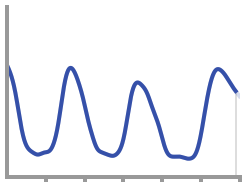

In [5]:
col0 = "#555555"
col1 = "#FF6F59"
col2 = "#55e59c"
col3 = "#3550a9"
gr1 = "#999999"
gr2 = "#dddddd"

# Create and style the figure and axes for the 2D neural timeseries plots
DPI = 96
fig0 = plt.figure(figsize=(400/DPI,300/DPI))
ax0 = fig0.add_subplot(1,1,1)
ax0.set_ylim(-0.3,0.7)
ax0.set_xlim(separated_trials["time"][7][2000],separated_trials["time"][7][3500])
ax0.spines["bottom"].set_linewidth(4)
ax0.spines["bottom"].set_color(gr1)
ax0.spines["left"].set_linewidth(4)
ax0.spines["left"].set_color(gr1)
ax0.spines["top"].set_linewidth(0)
ax0.spines["right"].set_linewidth(0)
ax0.tick_params(axis="y", length=0)
ax0.tick_params(axis="x", length=5, width=4, color=gr1)
ax0.set_xticklabels([])
ax0.set_yticklabels([])


def animate_neuron_trace_frame_maker(frames, axes, colour, dataset_x, dataset_y, i):
    for artist in axes.lines + axes.collections:
        artist.remove()
    index = round(i * (len(dataset_x)/frames))
    axes.plot(dataset_x[:], dataset_y[:], alpha=0.2, linewidth=4, color=colour)
    axes.plot(dataset_x[:index], dataset_y[:index], alpha=1, linewidth=4, color=colour)
    plt.vlines(x=dataset_x[index], ymin=-0.3, ymax=dataset_y[index], colors=gr2, linewidth=2)
    #plt.hlines(y=dataset_y[index], xmin=0, xmax=dataset_x[index], colors=gr2, linewidth=2)
    return axes.lines

neuron_time = separated_trials["time"][7][2000:3500]
neuron1_activity = separated_trials["data"][7][:,20][2000:3500]
neuron2_activity = separated_trials["data"][7][:,25][2000:3500]
neuron3_activity = separated_trials["data"][7][:,29][2000:3500]

# Apparently non-looping gifs with the version of Matplotlib used in this repo and the Pillow image writer aren't possible (because of a hard-coded parameter value in the ...)

frames = 60
anim_2d_neuron_1_trace_frame = lambda i: animate_neuron_trace_frame_maker(frames, ax0, col1, neuron_time, neuron1_activity, i)
anim_2d_neuron_1_trace = animation.FuncAnimation(fig0, anim_2d_neuron_1_trace_frame, frames=frames, interval=60, blit=True, repeat=True) 
anim_2d_neuron_1_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_2d_neuron_1_trace_loop.gif')) 
anim_2d_neuron_1_trace = animation.FuncAnimation(fig0, anim_2d_neuron_1_trace_frame, frames=frames, interval=60, blit=True, repeat=False) 
anim_2d_neuron_1_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_2d_neuron_1_trace.gif')) 

anim_2d_neuron_2_trace_frame = lambda i: animate_neuron_trace_frame_maker(frames, ax0, col2, neuron_time, neuron2_activity, i)
anim_2d_neuron_2_trace = animation.FuncAnimation(fig0, anim_2d_neuron_2_trace_frame, frames=frames, interval=60, blit=True, repeat=True) 
anim_2d_neuron_2_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_2d_neuron_2_trace_loop.gif')) 
anim_2d_neuron_2_trace = animation.FuncAnimation(fig0, anim_2d_neuron_2_trace_frame, frames=frames, interval=60, blit=True, repeat=False) 
anim_2d_neuron_2_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_2d_neuron_2_trace.gif')) 

anim_2d_neuron_3_trace_frame = lambda i: animate_neuron_trace_frame_maker(frames, ax0, col3, neuron_time, neuron3_activity, i)
anim_2d_neuron_3_trace = animation.FuncAnimation(fig0, anim_2d_neuron_3_trace_frame, frames=frames, interval=60, blit=True, repeat=True) 
anim_2d_neuron_3_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_2d_neuron_3_trace_loop.gif')) 
anim_2d_neuron_3_trace = animation.FuncAnimation(fig0, anim_2d_neuron_3_trace_frame, frames=frames, interval=60, blit=True, repeat=False) 
anim_2d_neuron_3_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_2d_neuron_3_trace.gif')) 


In [7]:
# Function to reset the base style for the 3d axes
def reformat_3d_axes(ax3d):
    ax3d.set_xlim(-0.3,0.75)
    ax3d.set_ylim(-0.3,0.25)
    ax3d.set_zlim(-0.3,0.4)
    ax3d.set_facecolor("white")

    ax3d.xaxis.set_rotate_label(False) 
    ax3d.set_xlabel('$n_1$', fontsize=30)
    ax3d.yaxis.set_rotate_label(False) 
    ax3d.set_ylabel('$n_2$', fontsize=30)
    ax3d.zaxis.set_rotate_label(False) 
    ax3d.set_zlabel('$n_3$', fontsize=30)


    ax3d.zaxis._axinfo['grid']['color'] = (0,0,0,0.05)
    ax3d.yaxis._axinfo['grid']['color'] = (0,0,0,0.05)
    ax3d.xaxis._axinfo['grid']['color'] = (0,0,0,0.05)

    ax3d.w_xaxis.line.set_linewidth(4)
    ax3d.w_xaxis.line.set_color(gr1)
    ax3d.w_yaxis.line.set_linewidth(4)
    ax3d.w_yaxis.line.set_color(gr1)
    ax3d.w_zaxis.line.set_linewidth(0)

    ax3d.view_init(30, 65)

    ax3d.xaxis.set_major_locator(FixedLocator([-10]))
    ax3d.yaxis.set_major_locator(FixedLocator([-10]))
    ax3d.zaxis.set_major_locator(FixedLocator([-10]))

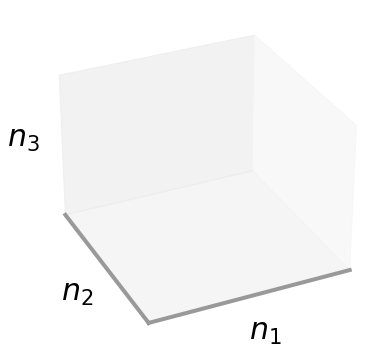

In [8]:
import math
from matplotlib.ticker import FixedLocator
from matplotlib.colors import LightSource

# Select the appropriate data for the 3D plots
neuron_time = separated_trials["time"][7][2000:3500]
neuron1_activity = separated_trials["data"][7][:,20][2000:3500]
neuron2_activity = separated_trials["data"][7][:,25][2000:3500]
neuron3_activity = separated_trials["data"][7][:,29][2000:3500]

# Perform PCA dimensionality reduction on the chosen data
pca = PCA(n_components = 2)
pca.fit(separated_trials["data"][7][:,(20,25,29)])
X = pca.transform(separated_trials["data"][7][2000:3500,(20,25,29)])

# Initialise the figure and axes for 3D plotting
fig3d = plt.figure(figsize=(800/DPI,600/DPI))
ax3d = fig3d.add_subplot(1,1,1, projection='3d')
fig3d.set_facecolor("#ffffff")
ax3d.set_facecolor("#ffffff")
reformat_3d_axes(ax3d)

# A hack to hide the axis ticks
ax3d.xaxis.set_major_locator(FixedLocator([-10]))
ax3d.yaxis.set_major_locator(FixedLocator([-10]))
ax3d.zaxis.set_major_locator(FixedLocator([-10]))

# A utility for 3D rotations. From stackoverflow.com/questions/6802577/rotation-of-3d-vector
def rotation_matrix(axis, theta):
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

# Compute the coordinates for the PCA plane embedded in 3D space
xx, zz = np.meshgrid(np.linspace(-0.25,0.7,2), np.linspace(-0.3,0.4,2))
n = np.cross(pca.components_[1], pca.components_[0])
a = np.array([-0.1,-0.3,0])
d = -a.dot(n)
#z = (-n[0] * xx - n[1] * yy - d) * 1. /n[2]
y = (zz * n[2] + n[0] * xx + d)/(-n[1])
angleX = math.acos(np.dot(pca.components_[0], [1,0,0])/np.linalg.norm(pca.components_[0]))
angleY = math.acos(np.dot(pca.components_[1], [0,1,0])/np.linalg.norm(pca.components_[1]))
Xra = np.dot(rotation_matrix([0, 1, 0], angleX), [X[:,0], (X[:,1] * n[2] + n[0] * X[:,0] + d)/(-n[1]), X[:,1]])

# The (approximate) projection of the 3D trajectory onto the 2D plane embedded in 3D space
Xr = np.dot(rotation_matrix([1, 0, 0], angleY-math.pi/2), Xra)

In [8]:

def animate_trajectory_trace_frame_maker(frames, axes, colour, dataset_x, dataset_y, dataset_z, i):
    for artist in axes.lines + axes.collections:
        artist.remove()
    axes.clear()
    reformat_3d_axes(axes)
    index = round(i * (len(dataset_x)/frames))
    axes.view_init(30, 65)
    axes.plot(dataset_x, dataset_y, dataset_z, color = colour, linewidth=3, alpha=0.2)
    axes.plot(dataset_x[:index], dataset_y[:index], dataset_z[:index], color = colour, linewidth=3, alpha=1)
    return axes.lines

frames = 60
anim_3d_trajectory_trace_frame = lambda i: animate_trajectory_trace_frame_maker(frames, ax3d, col0, neuron1_activity, neuron2_activity, neuron3_activity, i)
anim_3d_trajectory_trace = animation.FuncAnimation(fig3d, anim_3d_trajectory_trace_frame, frames=frames, interval=60, blit=True, repeat=False) 
anim_3d_trajectory_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_trajectory_trace.gif'), dpi=DPI)

anim_3d_trajectory_trace_loop = animation.FuncAnimation(fig3d, anim_3d_trajectory_trace_frame, frames=frames, interval=60, blit=True, repeat=True) 
anim_3d_trajectory_trace.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_trajectory_trace_loop.gif'), dpi=DPI)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
# A smoothing function to let the rotations ease in and out
def smootherstep(t):
    if t < 0:
        return 0
    if t > 1:
        return 1
    return 6*t**5 - 15*t**4 + 10*t**3

# Rotate the 3D axes to show a direction in which the data varies less strongly
def animate_rotate_out_back_frame_maker(frames, axes, colour, dataset_x, dataset_y, dataset_z, start_angles, end_angles, i):
    for artist in axes.lines + axes.collections:
        artist.remove()
    angle0 = (start_angles[0] - smootherstep(i/frames) * ((start_angles[0] - end_angles[0])))
    angle1 = (start_angles[1] - smootherstep(i/frames) * ((start_angles[1] - end_angles[1])))
    axes.elev = angle0
    axes.azim = angle1
    axes.plot(dataset_x, dataset_y, dataset_z, color = colour, linewidth=3, alpha=1)
    return axes.lines

ax3d.clear()
reformat_3d_axes(ax3d)

frames = 60
anim_3d_rotate_out_frame = lambda i: animate_rotate_out_back_frame_maker(frames, ax3d, col0, neuron1_activity, neuron2_activity, neuron3_activity, [30,65], [0,-30], i)
anim_3d_rotate_out = animation.FuncAnimation(fig3d, anim_3d_rotate_out_frame, frames=frames, interval=60, blit=True, repeat=False) 
anim_3d_rotate_out.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_rotate_out.gif'), dpi=DPI) 

anim_3d_rotate_out_freeze_start = animation.FuncAnimation(fig3d, anim_3d_rotate_out_frame, frames=1, interval=60, blit=True, repeat=False) 
anim_3d_rotate_out_freeze_start.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_rotate_out_freeze_start.gif'), dpi=DPI) 

anim_3d_rotate_back_frame = lambda i: animate_rotate_out_back_frame_maker(frames, ax3d, col0, neuron1_activity, neuron2_activity, neuron3_activity, [0,-30], [30,65], i)
anim_3d_rotate_back = animation.FuncAnimation(fig3d, anim_3d_rotate_back_frame, frames=frames, interval=60, blit=True, repeat=False) 
anim_3d_rotate_back.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_rotate_back.gif'), dpi=DPI) 

anim_3d_rotate_back_freeze_start = animation.FuncAnimation(fig3d, anim_3d_rotate_back_frame, frames=1, interval=60, blit=True, repeat=False) 
anim_3d_rotate_back_freeze_start.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_rotate_back_freeze_start.gif'), dpi=DPI) 

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [10]:
# Trace the PCA projection onto a projection plane embedded within the 3D neural state space
def animate_pca_plane_frame_maker(frames, axes, axes_on, colour, dataset_x, dataset_y, dataset_z, pca_image_x, pca_image_y, pca_image_z, surface_x, surface_y, surface_z, i):
    for artist in axes.lines + axes.collections:
        artist.remove()

    # This is the only way I've found of clearing the plotted surfaces each frame
    axes.clear()
    reformat_3d_axes(axes)

    if axes_on:
        axes.set_axis_on()
    else: 
        axes.set_axis_off()

    index = round(i * (len(dataset_x)/frames))

    # Plot the 3D neural trajectory
    axes.plot(dataset_x, dataset_y, dataset_z, color = colour, linewidth=3, alpha=0.2)
    axes.plot(dataset_x[:index], dataset_y[:index], dataset_z[:index], color = colour, linewidth=3, alpha=1)

    # Plot the plane
    axes.plot_surface(surface_x, surface_y, surface_z, color="black", alpha=0.1, lightsource=LightSource(azdeg=0, altdeg=65))

    #Plot the PCA image
    axes.plot(pca_image_x, pca_image_y, pca_image_z, alpha=.2, color=colour)
    axes.plot(pca_image_x[:index], pca_image_y[:index], pca_image_z[:index], alpha=.7, color=colour, linewidth=3)

    # Plot a projection ray from the high-dimensional trajectory to the PCA image
    axes.plot([pca_image_x[index], dataset_x[index]], [pca_image_y[index], dataset_y[index]], [pca_image_z[index], dataset_z[index]], linestyle=':', color = colour, alpha=0.75)

    return axes.lines

ax3d.clear()
reformat_3d_axes(ax3d)
frames = 120
anim_3d_pca_plane_frame = lambda i: animate_pca_plane_frame_maker(frames, ax3d, False, col0, neuron1_activity, neuron2_activity, neuron3_activity, Xr[0], Xr[1], Xr[2], xx, y, zz, i)
anim_3d_pca_no_axes = animation.FuncAnimation(fig3d, anim_3d_pca_plane_frame, frames=frames, interval=60, blit=True, repeat=False)
anim_3d_pca_no_axes.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_pca_no_axes.gif'), dpi=DPI)  

anim_3d_pca_no_axes_freeze_end = animation.FuncAnimation(fig3d, lambda i: anim_3d_pca_plane_frame(frames-1), frames=1, interval=60, blit=True, repeat=False)
anim_3d_pca_no_axes_freeze_end.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_pca_no_axes_freeze_end.gif'), dpi=DPI) 

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [24]:
# Rotate the 3D neural trajectory to overlay with the 2D PCA projection
def animate_pca_align_frame_maker(frames, axes, colour, dataset_x, dataset_y, dataset_z, start_angles, end_angles, pca_image_x, pca_image_y, pca_image_z, surface_x, surface_y, surface_z, i):
    for artist in axes.lines + axes.collections:
        artist.remove()
    
    # Clear surface from previous frame
    axes.clear()
    reformat_3d_axes(axes)

    # Make sure the axes are not showing
    axes.set_axis_off()

    # Interpolate (with smoothing) the angle for the current frame
    angle0 = (start_angles[0] - smootherstep(i/frames) * ((start_angles[0] - end_angles[0])))
    angle1 = (start_angles[1] - smootherstep(i/frames) * ((start_angles[1] - end_angles[1])))
    axes.elev = angle0
    axes.azim = angle1

    # Plot PCA plane
    axes.plot_surface(surface_x, surface_y, surface_z, color="black", alpha=0.1, lightsource=LightSource(azdeg=0, altdeg=65))

    # Plot (and fade out) 3d trajectory
    axes.plot(dataset_x, dataset_y, dataset_z, color = colour, linewidth=3, alpha = 1 - smootherstep(i/frames))

    # Plot PCA image
    axes.plot(pca_image_x, pca_image_y, pca_image_z, linewidth=3, alpha=.7, color=colour)

    return axes.lines

ax3d.clear()
reformat_3d_axes(ax3d)

frames = 60
# Make a rough guess at the end angles...
anim_3d_pca_align_frame = lambda i: animate_pca_align_frame_maker(frames, ax3d, col0, neuron1_activity, neuron2_activity, neuron3_activity, [30, 65], [(angleY-math.pi/2)*360/(2*math.pi), 95], Xr[0], Xr[1], Xr[2], xx, y, zz, i)
anim_3d_pca_align = animation.FuncAnimation(fig3d, anim_3d_pca_align_frame, frames=frames, interval=60, blit=True, repeat=False) 
anim_3d_pca_align.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_pca_align.gif'), dpi = DPI) 

anim_3d_pca_align_freeze_end = animation.FuncAnimation(fig3d, lambda i: anim_3d_pca_align_frame(frames-1), frames=1, interval=60, blit=True, repeat=False) 
anim_3d_pca_align_freeze_end.save(Path(OUTPUT_IMAGE_PATH,'anim_3d_pca_align_freeze_end.gif'), dpi=DPI)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [55]:
# This was an attempt to use Pillow to remove the loop from the gifs, but Pillow has even more bugs so it produces bad results... 
from PIL import Image
import glob
for filename in OUTPUT_IMAGE_PATH.glob("*.gif"):
    gif=Image.open(filename)
    frames = []
    for f in range(gif.n_frames):
        gif.seek(f)
        frames.append(gif.convert('RGBA'))

    gif.save(Path(OUTPUT_IMAGE_PATH,"noloop",filename.name), save_all=True, append_images=frames, optimize=False, dpi=DPI, loop=1)